<h1 style="color:66ccff;"><b>TITANIC SURVIVAL PREDICTION</b></h1>

<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Import Libraries
</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Load Dataset
</h3>

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Dataset Information
</h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Check Missing Values
</h3>

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Fill Missing Values
</h3>

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Drop Unnecessary Columns
</h3>

In [7]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Convert Text to Numbers
</h3>

In [8]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Graph - 1 [Survival Count]
</h3>

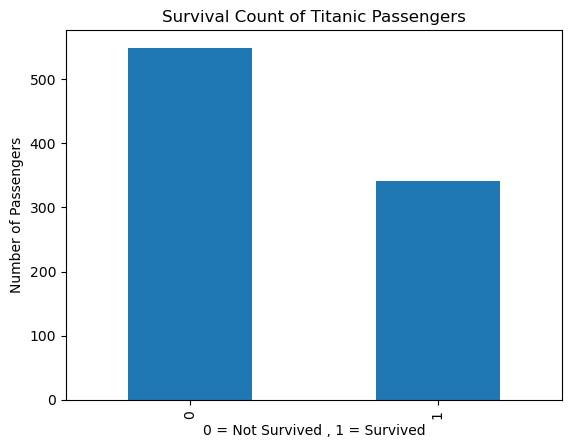

In [10]:
plt.figure()

df['Survived'].value_counts().plot(kind='bar')

plt.title("Survival Count of Titanic Passengers")

plt.xlabel("0 = Not Survived , 1 = Survived")

plt.ylabel("Number of Passengers")

plt.show()

<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Graph - 2 [Survival by Gender]
</h3>

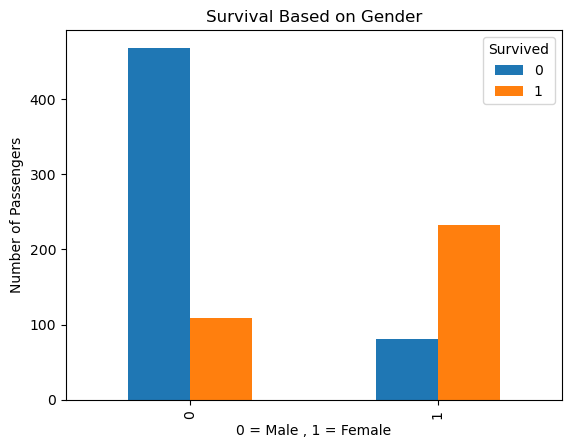

In [13]:
pd.crosstab(df['Sex'],df['Survived']).plot(kind='bar')

plt.title("Survival Based on Gender")

plt.xlabel("0 = Male , 1 = Female")

plt.ylabel("Number of Passengers")

plt.show()

<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Graph - 3 [Survival by Passenger Class]
</h3>

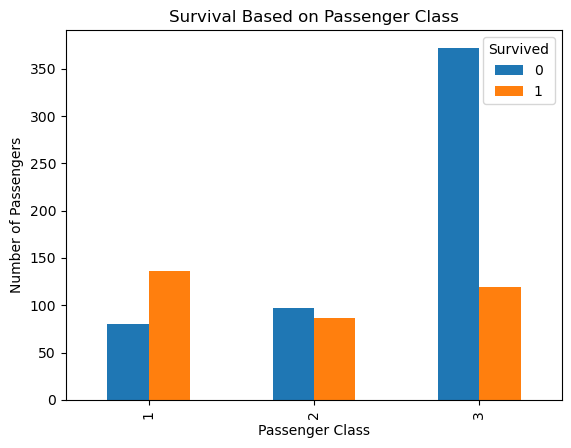

In [14]:
pd.crosstab(df['Pclass'],df['Survived']).plot(kind='bar')

plt.title("Survival Based on Passenger Class")

plt.xlabel("Passenger Class")

plt.ylabel("Number of Passengers")

plt.show()

<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Graph - 4 [Age Distribution]
</h3>

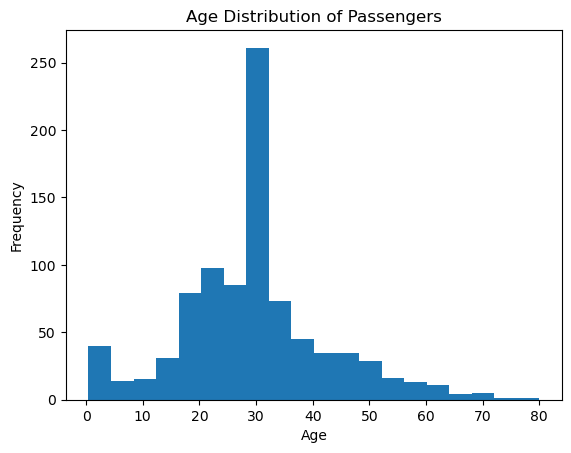

In [15]:
plt.hist(df['Age'],bins=20)

plt.title("Age Distribution of Passengers")

plt.xlabel("Age")

plt.ylabel("Frequency")

plt.show()

<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Define X and Y
</h3>

In [16]:
X = df.drop('Survived',axis=1)

Y = df['Survived']

<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Train Test Split
</h3>

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size=0.2,random_state=42
)

<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Train Model
</h3>

In [18]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Model Accuracy
</h3>

In [19]:
predictions = model.predict(X_test)

accuracy = accuracy_score(Y_test,predictions)

print("Model Accuracy =",accuracy)

Model Accuracy = 0.7988826815642458


<h3 style="color:cyan; background-color:black; padding:6px; border-radius:6px;">
Final Prediction of Passenger Survival
</h3>

In [20]:
#Example 1
# Format: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

result = model.predict([[3,0,40,0,0,7,2]])

if(result[0]==0):
    print("Not Survived")
else:
    print("Survived")

Not Survived


In [22]:
#Example 2

result = model.predict([[1,1,25,0,0,80,0]])

if(result[0]==0):
    print("Not Survived")
else:
    print("Survived")

Survived
